In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
from platforms.pixel_energy import pixel_energy
model = pixel_energy

## Estimate energy from CPU utilization

In [4]:
nrg = model.estimate_from_cpu_util([200, 0, 0, 0])
nrg

{(0,): 118.44444444444444,
 (0, 1): 3.5555555555555554,
 (1,): 0.0,
 (2,): 0.0,
 (2, 3): 0.0,
 (3,): 0.0}

In [5]:
sum(nrg.values())

122.0

In [6]:
nrg = model.estimate_from_cpu_util([0, 0, 200, 0])
nrg

{(0,): 0.0,
 (0, 1): 0.0,
 (1,): 0.0,
 (2,): 118.44444444444444,
 (2, 3): 3.5555555555555554,
 (3,): 0.0}

In [7]:
sum(nrg.values())

122.0

## Find best way to distribute work

In [8]:
tasks = {'task1': 150, 'task2': 400}
placements = model.get_optimal_placements(tasks)
placements

[(0, 400, 150, 0), (400, 0, 150, 0), (0, 400, 0, 150), (400, 0, 0, 150)]

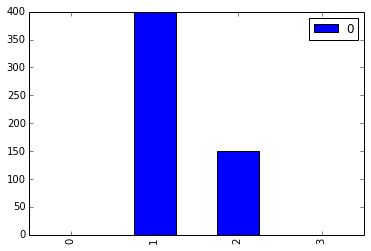

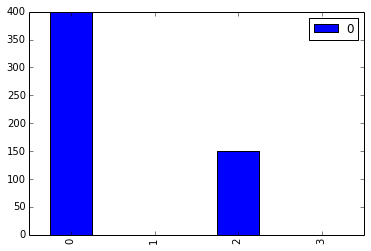

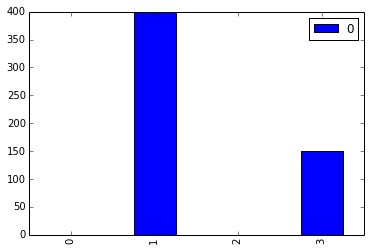

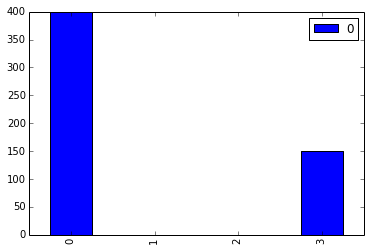

In [9]:
for placement in placements:
    pd.DataFrame(list(placement)).plot(kind='bar')

# Demo `sched_group_energy`

In [17]:
from trace import Trace
from trappy.plotter import plot_trace
from trappy import ILinePlot
import json
with open('pixel.json') as js:
    pixel = json.load(js)
trace_path = 'pixel_wmig_trace.dat'

In [11]:
trace = Trace(pixel, trace_path, ['sched_load_avg_cpu', 'cpu_idle', 'sched_switch'])

In [12]:
plot_trace(trace.ftrace)

In [14]:
sge = model.mimic_sched_group_energy(trace)

In [19]:
ILinePlot(sge, column=sge.columns.tolist(), drawstyle='steps-post').view()

""
""


In [25]:
ILinePlot(pd.DataFrame(sge.sum(axis=1)), column=0, drawstyle='steps-post').view()

""
""
